# LFP example with stim strength

In [1]:
from bayes_window import models, fake_spikes_explore, BayesWindow
from bayes_window.generative_models import generate_fake_lfp
from importlib import reload
import numpy as np
import altair as alt
import pandas as pd

## ISI

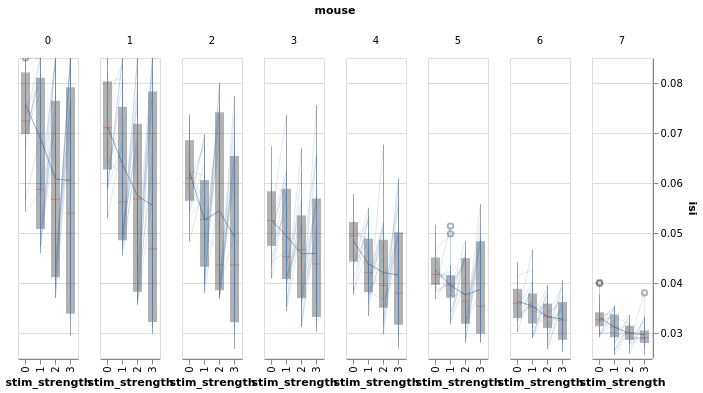

In [44]:
df=[]
for slope in np.linspace(4,40,4):
    df1=generate_fake_lfp(mouse_response_slope=slope)[0]
    df1['stim_strength']=slope
    df.append(df1)
df=pd.concat(df)


BayesWindow(df, 'isi', treatment='stim_strength',  group='mouse', detail='i_trial').data_box_detail()


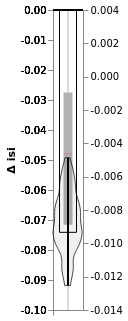

In [45]:
window=BayesWindow(df, 'isi', treatment='stim_strength',  group='mouse', detail='i_trial')
window.fit_slopes(add_group_slope=False,dist_y='gamma')
window.chart

In [46]:
window.explore_model_kinds()

AttributeError: 'BayesWindow' object has no attribute 'explore_model_kinds'

In [ ]:
## Power

## Power

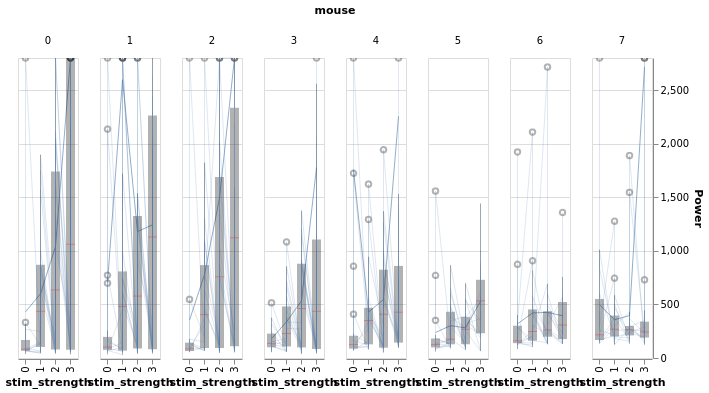

In [4]:
df=[]
for slope in np.linspace(4,400,4):
    df1=generate_fake_lfp(mouse_response_slope=slope)[0]
    df1['stim_strength']=slope
    df.append(df1)
df=pd.concat(df)


BayesWindow(df, 'Power', treatment='stim_strength',  group='mouse', detail='i_trial').data_box_detail()


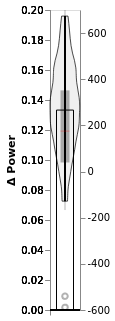

In [34]:
window=BayesWindow(df, 'Power', treatment='stim_strength',  group='mouse', detail='i_trial')
window.fit_slopes(add_group_slope=False,dist_y='gamma')
window.chart

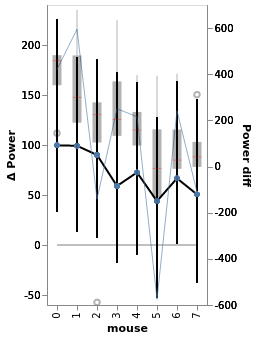

In [42]:
from importlib import reload
from bayes_window import workflow
reload(workflow)

window=workflow.BayesWindow(df, 'Power', treatment='stim_strength',  condition='mouse', detail='i_trial')
window.fit_slopes(add_condition_slope=True,center_intercept=True,dist_y='gamma')
window.chart



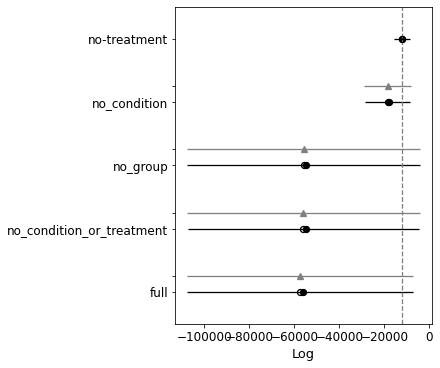

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
no-treatment,0,-12273.520877,253.007329,0.000000,0.047719,3636.980301,0.000000,True,log
no_condition,1,-18599.310650,442.444029,6325.789773,0.301395,9825.662387,10505.821993,True,log
no_group,2,-55818.496777,1103.237846,43544.975900,0.309405,51683.192984,51837.025583,False,log
no_condition_or_treatment,3,-55946.967754,963.120636,43673.446877,0.074914,51504.745403,51665.868968,True,log
full,4,-57440.559317,1109.317119,45167.038440,0.266568,50093.662496,50252.302234,True,log


In [43]:
window.explore_model_kinds()

In [ ]:
window.explore_models()

In [ ]:
window.explore_models()

In [ ]:
window.explore_models()